In [43]:
from datasets import load_dataset

ds = load_dataset("antoniomenezes/go_emotions_ptbr")

ds

Found cached dataset csv (/users/jmperez/.cache/huggingface/datasets/antoniomenezes___csv/raw-30cf391cb2a99fe8/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral', 'texto'],
        num_rows: 211225
    })
})

Let's check that this is the same as the emotion dataset in English


In [44]:
ds_en = load_dataset("go_emotions", "raw")

ds_en_simplified = load_dataset("go_emotions", "simplified")
ds_en, ds_en_simplified

Found cached dataset go_emotions (/users/jmperez/.cache/huggingface/datasets/go_emotions/raw/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d)


  0%|          | 0/1 [00:00<?, ?it/s]

Found cached dataset go_emotions (/users/jmperez/.cache/huggingface/datasets/go_emotions/simplified/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d)


  0%|          | 0/3 [00:00<?, ?it/s]

(DatasetDict({
     train: Dataset({
         features: ['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral'],
         num_rows: 211225
     })
 }),
 DatasetDict({
     train: Dataset({
         features: ['text', 'labels', 'id'],
         num_rows: 43410
     })
     validation: Dataset({
         features: ['text', 'labels', 'id'],
         num_rows: 5426
     })
     test: Dataset({
         features: ['text', 'labels', 'id'],
         num_rows: 5427
     })
 }))

In [3]:
df = ds["train"].to_pandas()
df_en = ds_en["train"].to_pandas()

## Sanity check

In [4]:
check_columns = [
    'author', 'subreddit', 'link_id', 'parent_id',
    'created_utc', 'rater_id', 'example_very_unclear', 'admiration',
    'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
    'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
    'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
    'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
    'remorse', 'sadness', 'surprise', 'neutral'
]

# Check df and df_en match for the same id 

(df[check_columns] == df_en[check_columns]).all()

author                   True
subreddit                True
link_id                  True
parent_id                True
created_utc              True
rater_id                 True
example_very_unclear    False
admiration               True
amusement                True
anger                    True
annoyance                True
approval                 True
caring                   True
confusion                True
curiosity                True
desire                   True
disappointment           True
disapproval              True
disgust                  True
embarrassment            True
excitement               True
fear                     True
gratitude                True
grief                    True
joy                      True
love                     True
nervousness              True
optimism                 True
pride                    True
realization              True
relief                   True
remorse                  True
sadness                  True
surprise  

In [5]:
(df["example_very_unclear"] != df_en["example_very_unclear"]).sum()

3411

(array([   70.,   592., 37335.,  2104., 17910.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

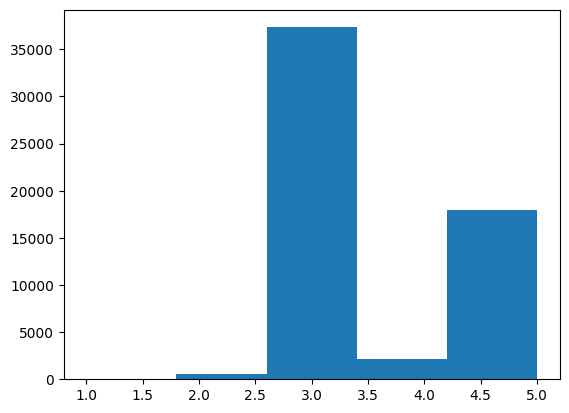

In [6]:
import matplotlib.pyplot as plt

ids = df["id"].value_counts()


plt.hist(ids, bins=5)

In [7]:
# Get ids with more than 3 ratings
ids = set(ids[ids >= 3].index)
ds = ds.filter(lambda x: x["id"] in ids)

ds

Filter:   0%|          | 0/211225 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral', 'texto'],
        num_rows: 209971
    })
})

In [8]:
df = ds["train"].to_pandas()

In [9]:
df.shape

(209971, 38)

In [10]:
columns = [ 
    'id',
    'example_very_unclear',
    'admiration',
    'amusement',
    'anger',
    'annoyance',
    'approval',
    'caring',
    'confusion',
    'curiosity',
    'desire',
    'disappointment',
    'disapproval',
    'disgust',
    'embarrassment',
    'excitement',
    'fear',
    'gratitude',
    'grief',
    'joy',
    'love',
    'nervousness',
    'optimism',
    'pride',
    'realization',
    'relief',
    'remorse',
    'sadness',
    'surprise',
    'neutral',
]



df_agg = df[columns].groupby("id")

# Add the number of ratings per id as a column

In [11]:
df_agg["example_very_unclear"]

In [12]:
df_agg = df_agg.sum()
df_agg = df_agg[df_agg["example_very_unclear"] == 0]
df_agg["count"] = df["id"].value_counts()

df_agg

,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,count
id,,,,,,,,,,,,,,,,,,,,,
eczb4bm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
eczb527,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,3
eczb6r7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,2,5
eczb770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,1,4
eczbbmd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
efhclgb,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,3
efhcm78,0,0,0,0,2,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,5
efhcnhz,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3


In [13]:
emotions = [
    'admiration', 'amusement', 'anger', 'annoyance',
    'approval', 'caring', 'confusion', 'curiosity', 'desire',
    'disappointment', 'disapproval', 'disgust', 'embarrassment',
    'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love',
    'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse',
    'sadness', 'surprise', 'neutral'
]

In [14]:


# Check if the emotion is present in more than half of the ratings
df_final = df_agg[emotions].gt(df_agg["count"] / 2, axis=0)

df_final = df_final.join(df[["id", "text", "texto"]].set_index("id")).reset_index()

# Reorder columns
df_final = df_final[["id", "text", "texto"] + emotions].copy()


df_final

,id,text,texto,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,eczb4bm,TL;DR No more Superbowls for [NAME]. Get ready...,TL;DR Não há mais Super Bowls para [NAME]. Pre...,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,eczb4bm,TL;DR No more Superbowls for [NAME]. Get ready...,TL;DR Não há mais Super Bowls para [NAME]. Pre...,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,eczb4bm,TL;DR No more Superbowls for [NAME]. Get ready...,TL;DR Não há mais Super Bowls para [NAME]. Pre...,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,eczb527,So much time saved. Not.,Tanto tempo economizado. Não.,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,eczb527,So much time saved. Not.,Tanto tempo economizado. Não.,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198152,efhcreo,Hahaha perfect.,Hahaha perfeito.,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198153,efhcreo,Hahaha perfect.,Hahaha perfeito.,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198154,efhcuxi,Ok now that was epic!,"Ok, agora que foi épico!",False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
198155,efhcuxi,Ok now that was epic!,"Ok, agora que foi épico!",False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [15]:
df_final.sample(10)

,id,text,texto,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
53518,edn6n9q,I feel I should do this even after living here...,Eu sinto que deveria fazer isso mesmo depois d...,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
111281,eecprap,What sorcery is this!,Que feitiçaria é essa!,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
138628,eepvslq,Enough already. I'm sorry that the breakup is ...,Já basta. Lamento que a separação seja doloros...,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,eczb6r7,Emotes have a ridiculous amount of effort put ...,Os emotes têm uma quantidade ridícula de esfor...,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
66527,edtamzl,And with the employee says “what coworker? I’m...,E com o funcionário diz “que colega de trabalh...,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45456,edjtzqw,What he said is entirely untrue fyi,O que ele disse é totalmente falso,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
159383,eeysutm,I think my worry would be if another dog attac...,Acho que minha preocupação seria se outro cach...,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
87191,ee2w7cg,Benzos do not help anxiety long term. they mak...,Benzos não ajudam a ansiedade a longo prazo. e...,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
31323,edcu9jw,Yeah I don’t think [NAME] wants you to fuck my...,"Sim, eu acho que [NOME] não quer mais que você...",False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
91078,ee4cv5g,"I don’t understand your question, why are you ...","Não entendi sua pergunta, por que você está ne...",False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False


Better option:

- Let's take the ds_en_simplified and use the translation to pt



In [33]:
id_to_pt = {row["id"]: row["texto"] for _, row in df.iterrows()}

new_ds = ds_en_simplified.filter(lambda x: x["id"] in id_to_pt)


Loading cached processed dataset at /users/jmperez/.cache/huggingface/datasets/go_emotions/simplified/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d/cache-cc9dd3a66cf6bb04.arrow
Loading cached processed dataset at /users/jmperez/.cache/huggingface/datasets/go_emotions/simplified/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d/cache-c89027ba8ef947a7.arrow
Loading cached processed dataset at /users/jmperez/.cache/huggingface/datasets/go_emotions/simplified/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d/cache-75d79a3b424dd37b.arrow


In [34]:
from datasets import DatasetDict
new_ds = new_ds.map(lambda ex: {"text": id_to_pt[ex["id"]], "text_original": ex["text"]})


new_ds = DatasetDict({
    "train": new_ds["train"],
    "dev": new_ds["validation"],
    "test": new_ds["test"],
})

new_ds.push_to_hub("pysentimiento/pt_emotion", private=True)

Loading cached processed dataset at /users/jmperez/.cache/huggingface/datasets/go_emotions/simplified/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d/cache-673e05a71b24d451.arrow
Loading cached processed dataset at /users/jmperez/.cache/huggingface/datasets/go_emotions/simplified/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d/cache-e0fdfecc28a2a640.arrow
Loading cached processed dataset at /users/jmperez/.cache/huggingface/datasets/go_emotions/simplified/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d/cache-b05da1b3ed20e1d0.arrow
Pushing split train to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/43 [00:00<?, ?ba/s]

Pushing split dev to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/6 [00:00<?, ?ba/s]

Pushing split test to the Hub.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/6 [00:00<?, ?ba/s]

In [35]:
new_ds.builder

AttributeError: 'DatasetDict' object has no attribute 'builder'

In [36]:
load_dataset?

Signature:
load_dataset(
    path: str,
    name: Union[str, NoneType] = None,
    data_dir: Union[str, NoneType] = None,
    data_files: Union[str, Sequence[str], Mapping[str, Union[str, Sequence[str]]], NoneType] = None,
    split: Union[str, datasets.splits.Split, NoneType] = None,
    cache_dir: Union[str, NoneType] = None,
    features: Union[datasets.features.features.Features, NoneType] = None,
    download_config: Union[datasets.download.download_config.DownloadConfig, NoneType] = None,
    download_mode: Union[datasets.download.download_manager.DownloadMode, str, NoneType] = None,
    verification_mode: Union[datasets.utils.info_utils.VerificationMode, str, NoneType] = None,
    ignore_verifications='deprecated',
    keep_in_memory: Union[bool, NoneType] = None,
    save_infos: bool = False,
    revision: Union[str, datasets.utils.version.Version, NoneType] = None,
    use_auth_token: Union[bool, str, NoneType] = None,
    task: Union[str, datasets.tasks.base.TaskTemplate, Non

In [1]:
%load_ext autoreload
%autoreload 2
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [2]:
import torch
from pysentimiento.training import load_model
from datasets import VerificationMode, load_dataset

ds = load_dataset("pysentimiento/pt_emotion", verification_mode=VerificationMode.NO_CHECKS)

model_name = "pysentimiento/robertuito-base-uncased"
lang = "pt"
emotions = ds["train"].features["labels"].feature.names

id2label = {i: label for i, label in enumerate(emotions)}
label2id = {label: i for i, label in enumerate(emotions)}


max_length = 128
auto_class = None

model, tokenizer = load_model(
    model_name, id2label=id2label, lang=lang,
    max_length=max_length, problem_type="multi_label_classification",
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = model.to(device)


In [3]:

def _convert_labels(ex):
    labels = [.0] * len(emotions)
    for l in ex["labels"]:
        labels[l] = 1.0
    return {"labels": labels, "foo": torch.tensor(labels)}

feature_names = ds["train"].features["labels"]

ds = ds.map(_convert_labels, batched=False)
ds = ds.remove_columns("labels")
ds = ds.rename_column("foo", "labels")

In [80]:
id2label, label2id, ds["train"][0]

({0: 'admiration',
  1: 'amusement',
  2: 'anger',
  3: 'annoyance',
  4: 'approval',
  5: 'caring',
  6: 'confusion',
  7: 'curiosity',
  8: 'desire',
  9: 'disappointment',
  10: 'disapproval',
  11: 'disgust',
  12: 'embarrassment',
  13: 'excitement',
  14: 'fear',
  15: 'gratitude',
  16: 'grief',
  17: 'joy',
  18: 'love',
  19: 'nervousness',
  20: 'optimism',
  21: 'pride',
  22: 'realization',
  23: 'relief',
  24: 'remorse',
  25: 'sadness',
  26: 'surprise',
  27: 'neutral'},
 {'admiration': 0,
  'amusement': 1,
  'anger': 2,
  'annoyance': 3,
  'approval': 4,
  'caring': 5,
  'confusion': 6,
  'curiosity': 7,
  'desire': 8,
  'disappointment': 9,
  'disapproval': 10,
  'disgust': 11,
  'embarrassment': 12,
  'excitement': 13,
  'fear': 14,
  'gratitude': 15,
  'grief': 16,
  'joy': 17,
  'love': 18,
  'nervousness': 19,
  'optimism': 20,
  'pride': 21,
  'realization': 22,
  'relief': 23,
  'remorse': 24,
  'sadness': 25,
  'surprise': 26,
  'neutral': 27},
 {'text': 'Minha

In [81]:
from transformers import DataCollatorWithPadding

def _tokenize_fun(x):
    return tokenizer(x['text'], padding=False, truncation=True)

tokenized_ds = ds.map(
    _tokenize_fun, batched=True
)


Map:   0%|          | 0/42958 [00:00<?, ? examples/s]

Map:   0%|          | 0/5375 [00:00<?, ? examples/s]

Map:   0%|          | 0/5372 [00:00<?, ? examples/s]

In [83]:
from transformers import Trainer, TrainingArguments
from pysentimiento.metrics import compute_metrics


def metrics_fun(x): 
    return compute_metrics(x, id2label=id2label)

training_args = TrainingArguments(
    output_dir="results",
)

trainer_args = {
    "model": model,
    "args": training_args,
    "compute_metrics": metrics_fun,
    "train_dataset": tokenized_ds["train"],
    "eval_dataset": tokenized_ds["dev"],
    "data_collator": DataCollatorWithPadding(tokenizer, padding="longest"),
    "tokenizer": tokenizer,
}


trainer = Trainer(**trainer_args)

trainer.train()


{'loss': 0.1679, 'learning_rate': 4.84481688392303e-05, 'epoch': 0.09}
{'loss': 0.1518, 'learning_rate': 4.6896337678460585e-05, 'epoch': 0.19}
{'loss': 0.1506, 'learning_rate': 4.534450651769088e-05, 'epoch': 0.28}


KeyboardInterrupt: 